In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [ ]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
df2 =df.copy(deep=True)  # Create a deep copy of the original dataset

# Replace 0s with NaN in selected columns
df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Show count of NaN values column-wise
print(df2.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#DATA VISUALIZATIONS

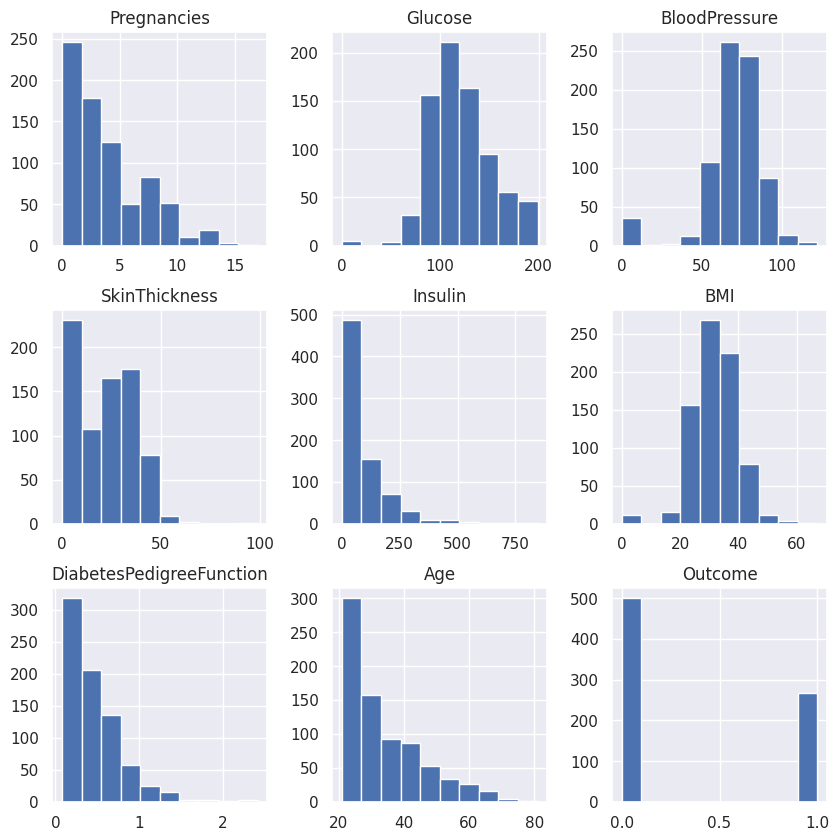

In [ ]:
p = df.hist(figsize=(10,10))

In [ ]:
# Aiming to impute NAN values for the columns in accordance with their distribution
df2['Glucose'].fillna(df2['Glucose'].mean(), inplace=True)
df2['BloodPressure'].fillna(df2['BloodPressure'].mean(), inplace=True)
df2['SkinThickness'].fillna(df2['SkinThickness'].median(), inplace=True)
df2['Insulin'].fillna(df2['Insulin'].median(), inplace=True)
df2['BMI'].fillna(df2['BMI'].median(), inplace=True)


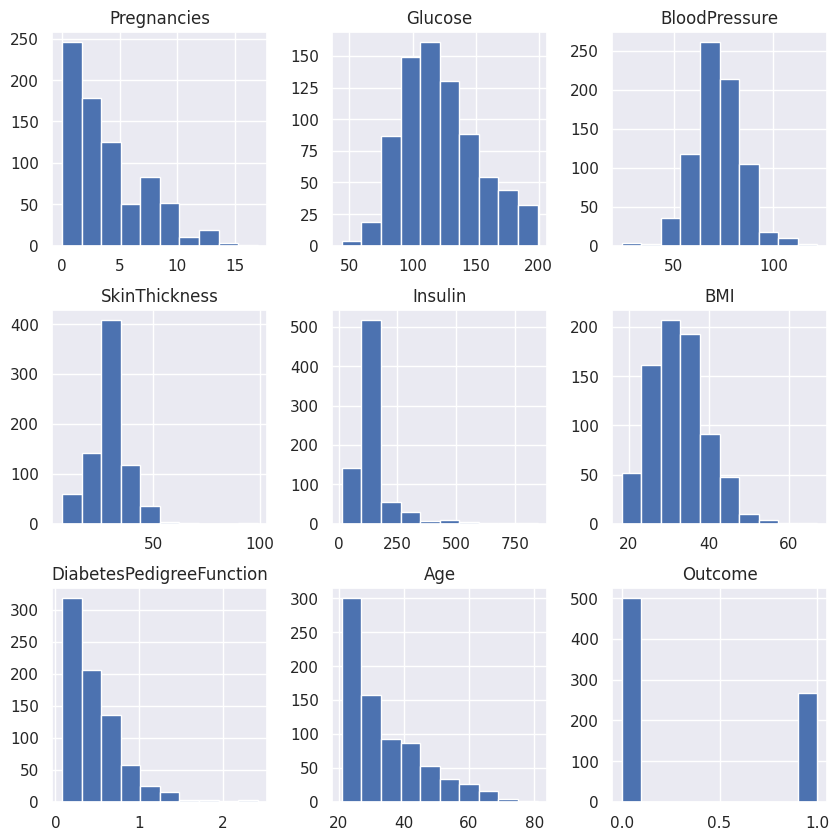

In [ ]:
p = df2.hist(figsize=(10,10))

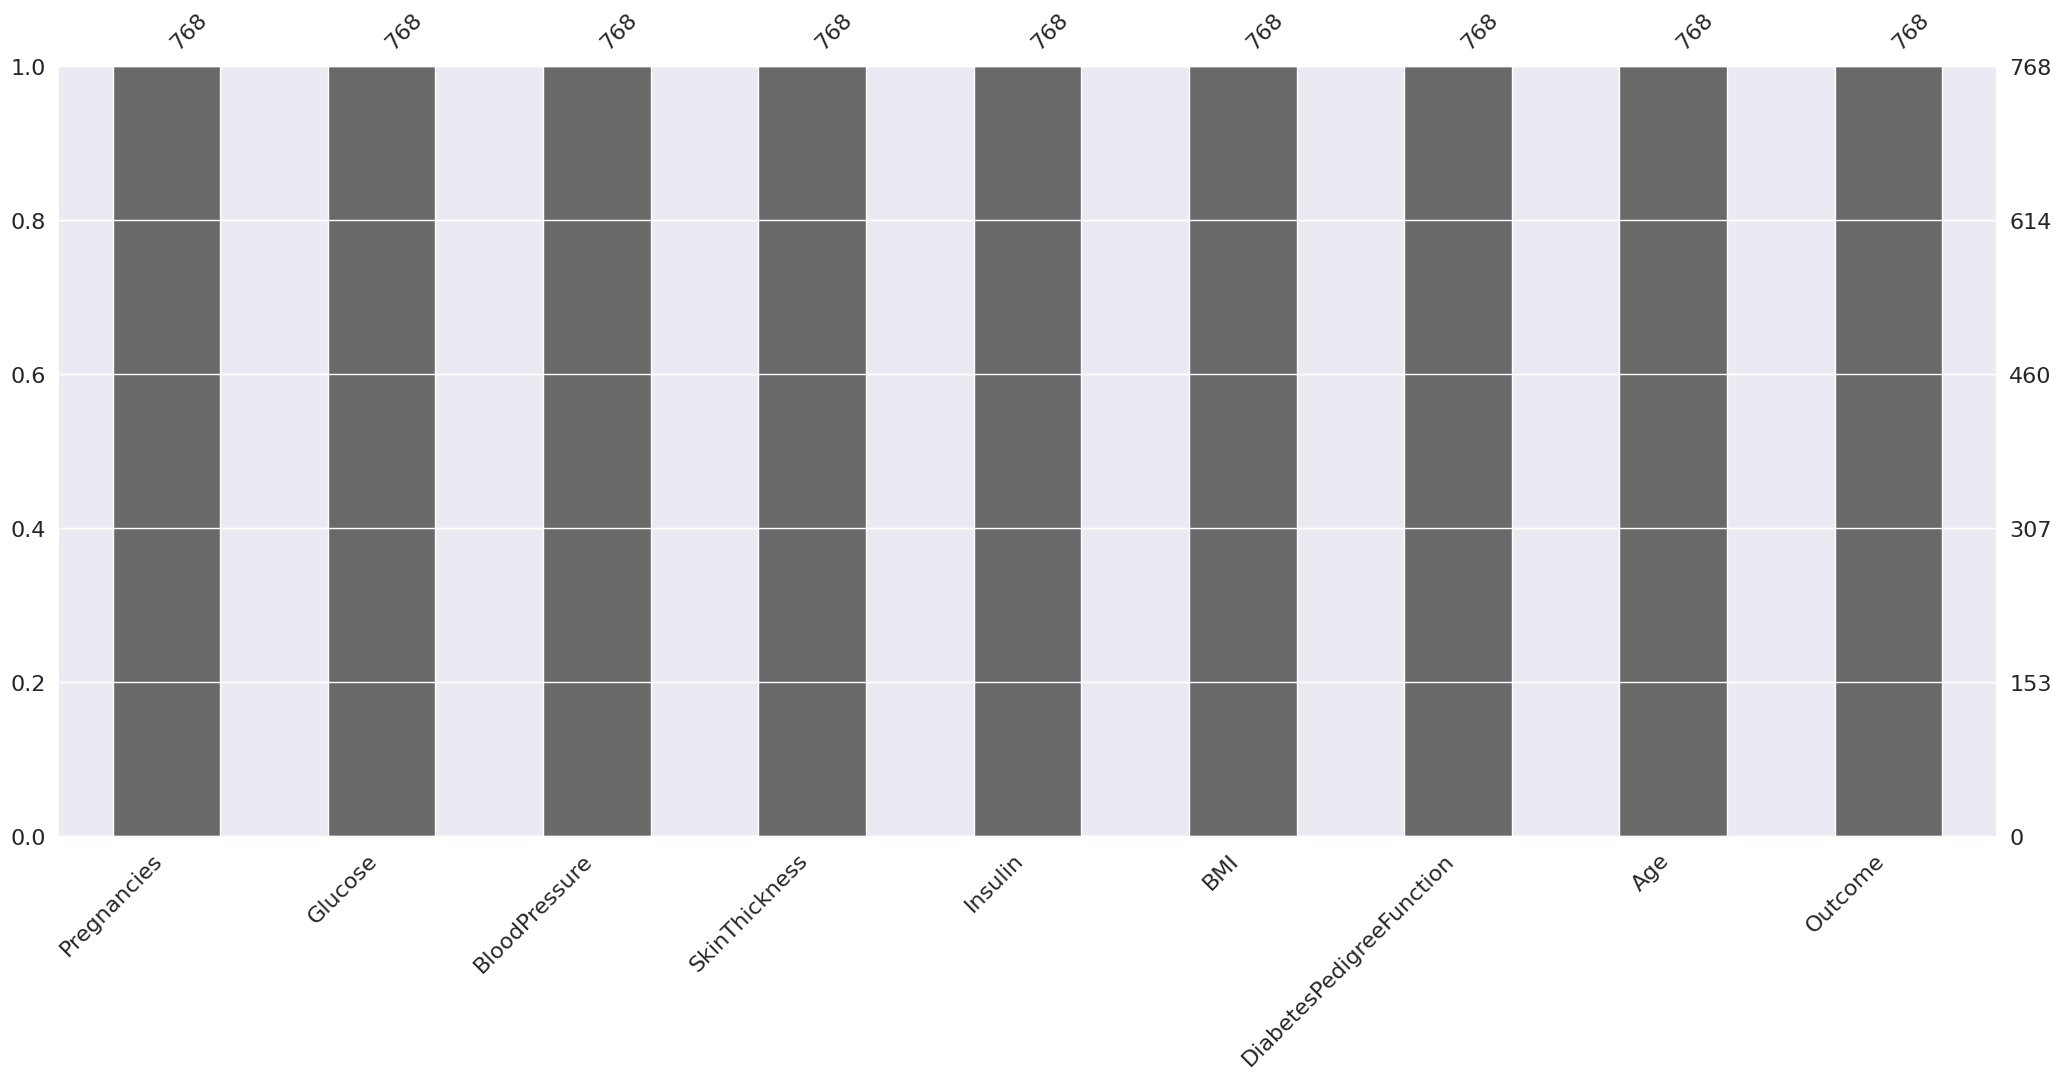

In [ ]:
p = msno.bar(df2)

Total Non-Diabetic Cases: 500
Total Diabetic Cases: 268


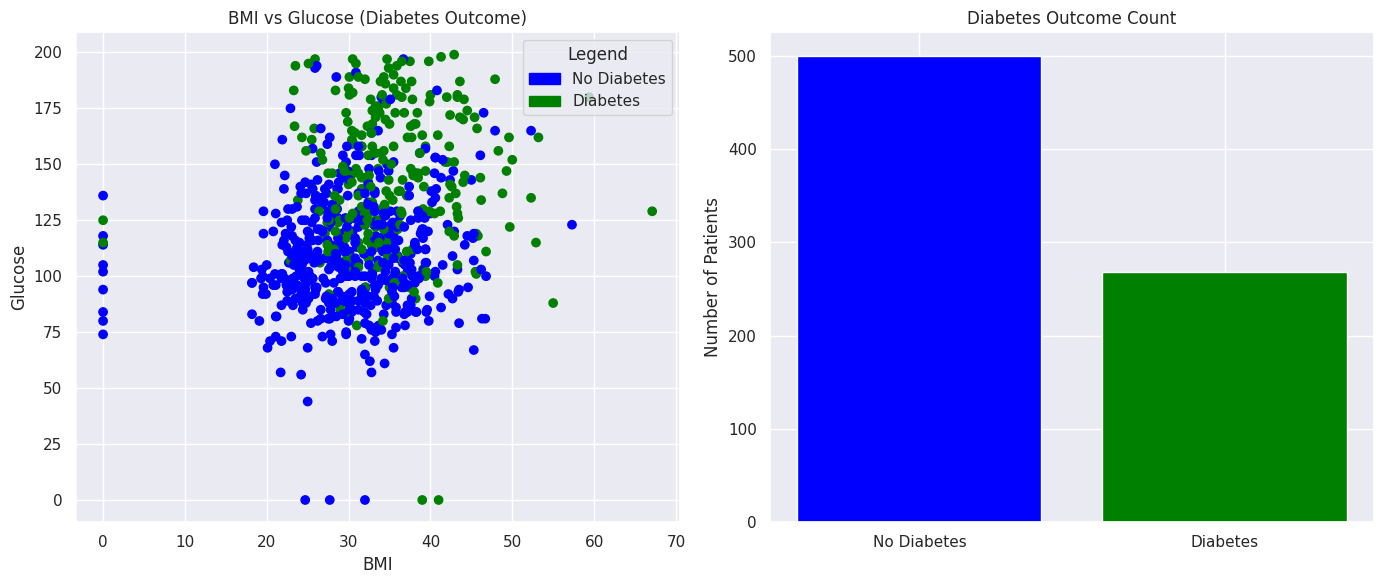

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

# Assuming df is your DataFrame and 'Outcome' is the correct column name
color_wheel = {0: "blue", 1: "green"}
colors = df["Outcome"].map(color_wheel)

# Count of each outcome
outcome_counts = df["Outcome"].value_counts().sort_index()
total_non_diabetic = outcome_counts.get(0, 0)
total_diabetic = outcome_counts.get(1, 0)

# Print both counts
print(f"Total Non-Diabetic Cases: {total_non_diabetic}")
print(f"Total Diabetic Cases: {total_diabetic}")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
ax1.scatter(df["BMI"], df["Glucose"], c=colors)
ax1.set_xlabel("BMI")
ax1.set_ylabel("Glucose")
ax1.set_title("BMI vs Glucose (Diabetes Outcome)")
legend_labels = [
    Patch(color='blue', label='No Diabetes'),
    Patch(color='green', label='Diabetes')
]
ax1.legend(handles=legend_labels, title="Legend", loc='upper right')

# Bar chart
bars = ax2.bar(["No Diabetes", "Diabetes"], outcome_counts, color=["blue", "green"])
ax2.set_title("Diabetes Outcome Count")
ax2.set_ylabel("Number of Patients")

# Show plots
plt.tight_layout()
plt.show()


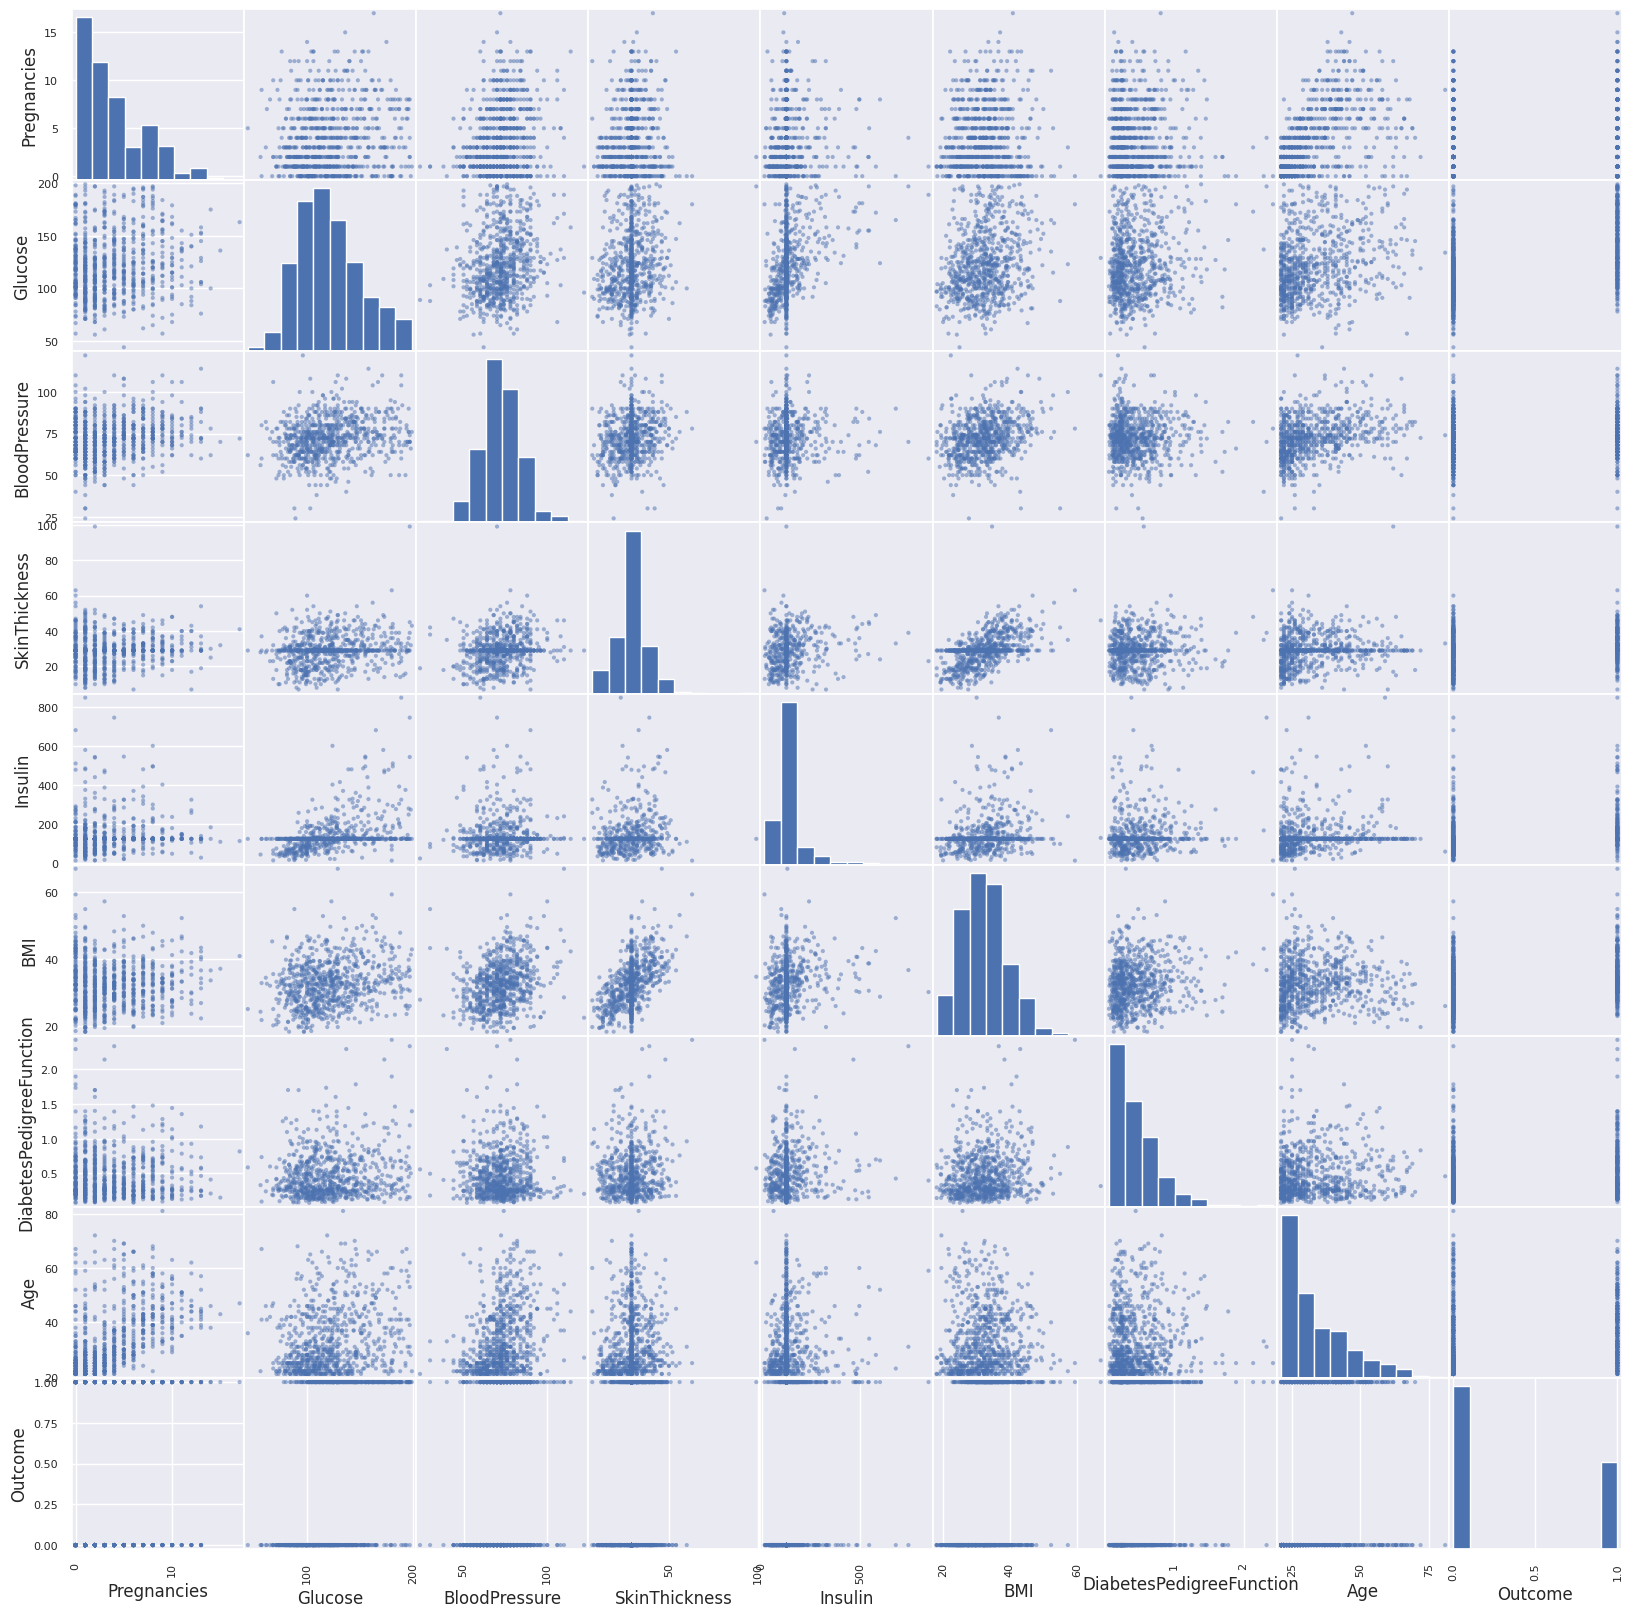

In [ ]:
p = scatter_matrix(df2, figsize=(20,20))

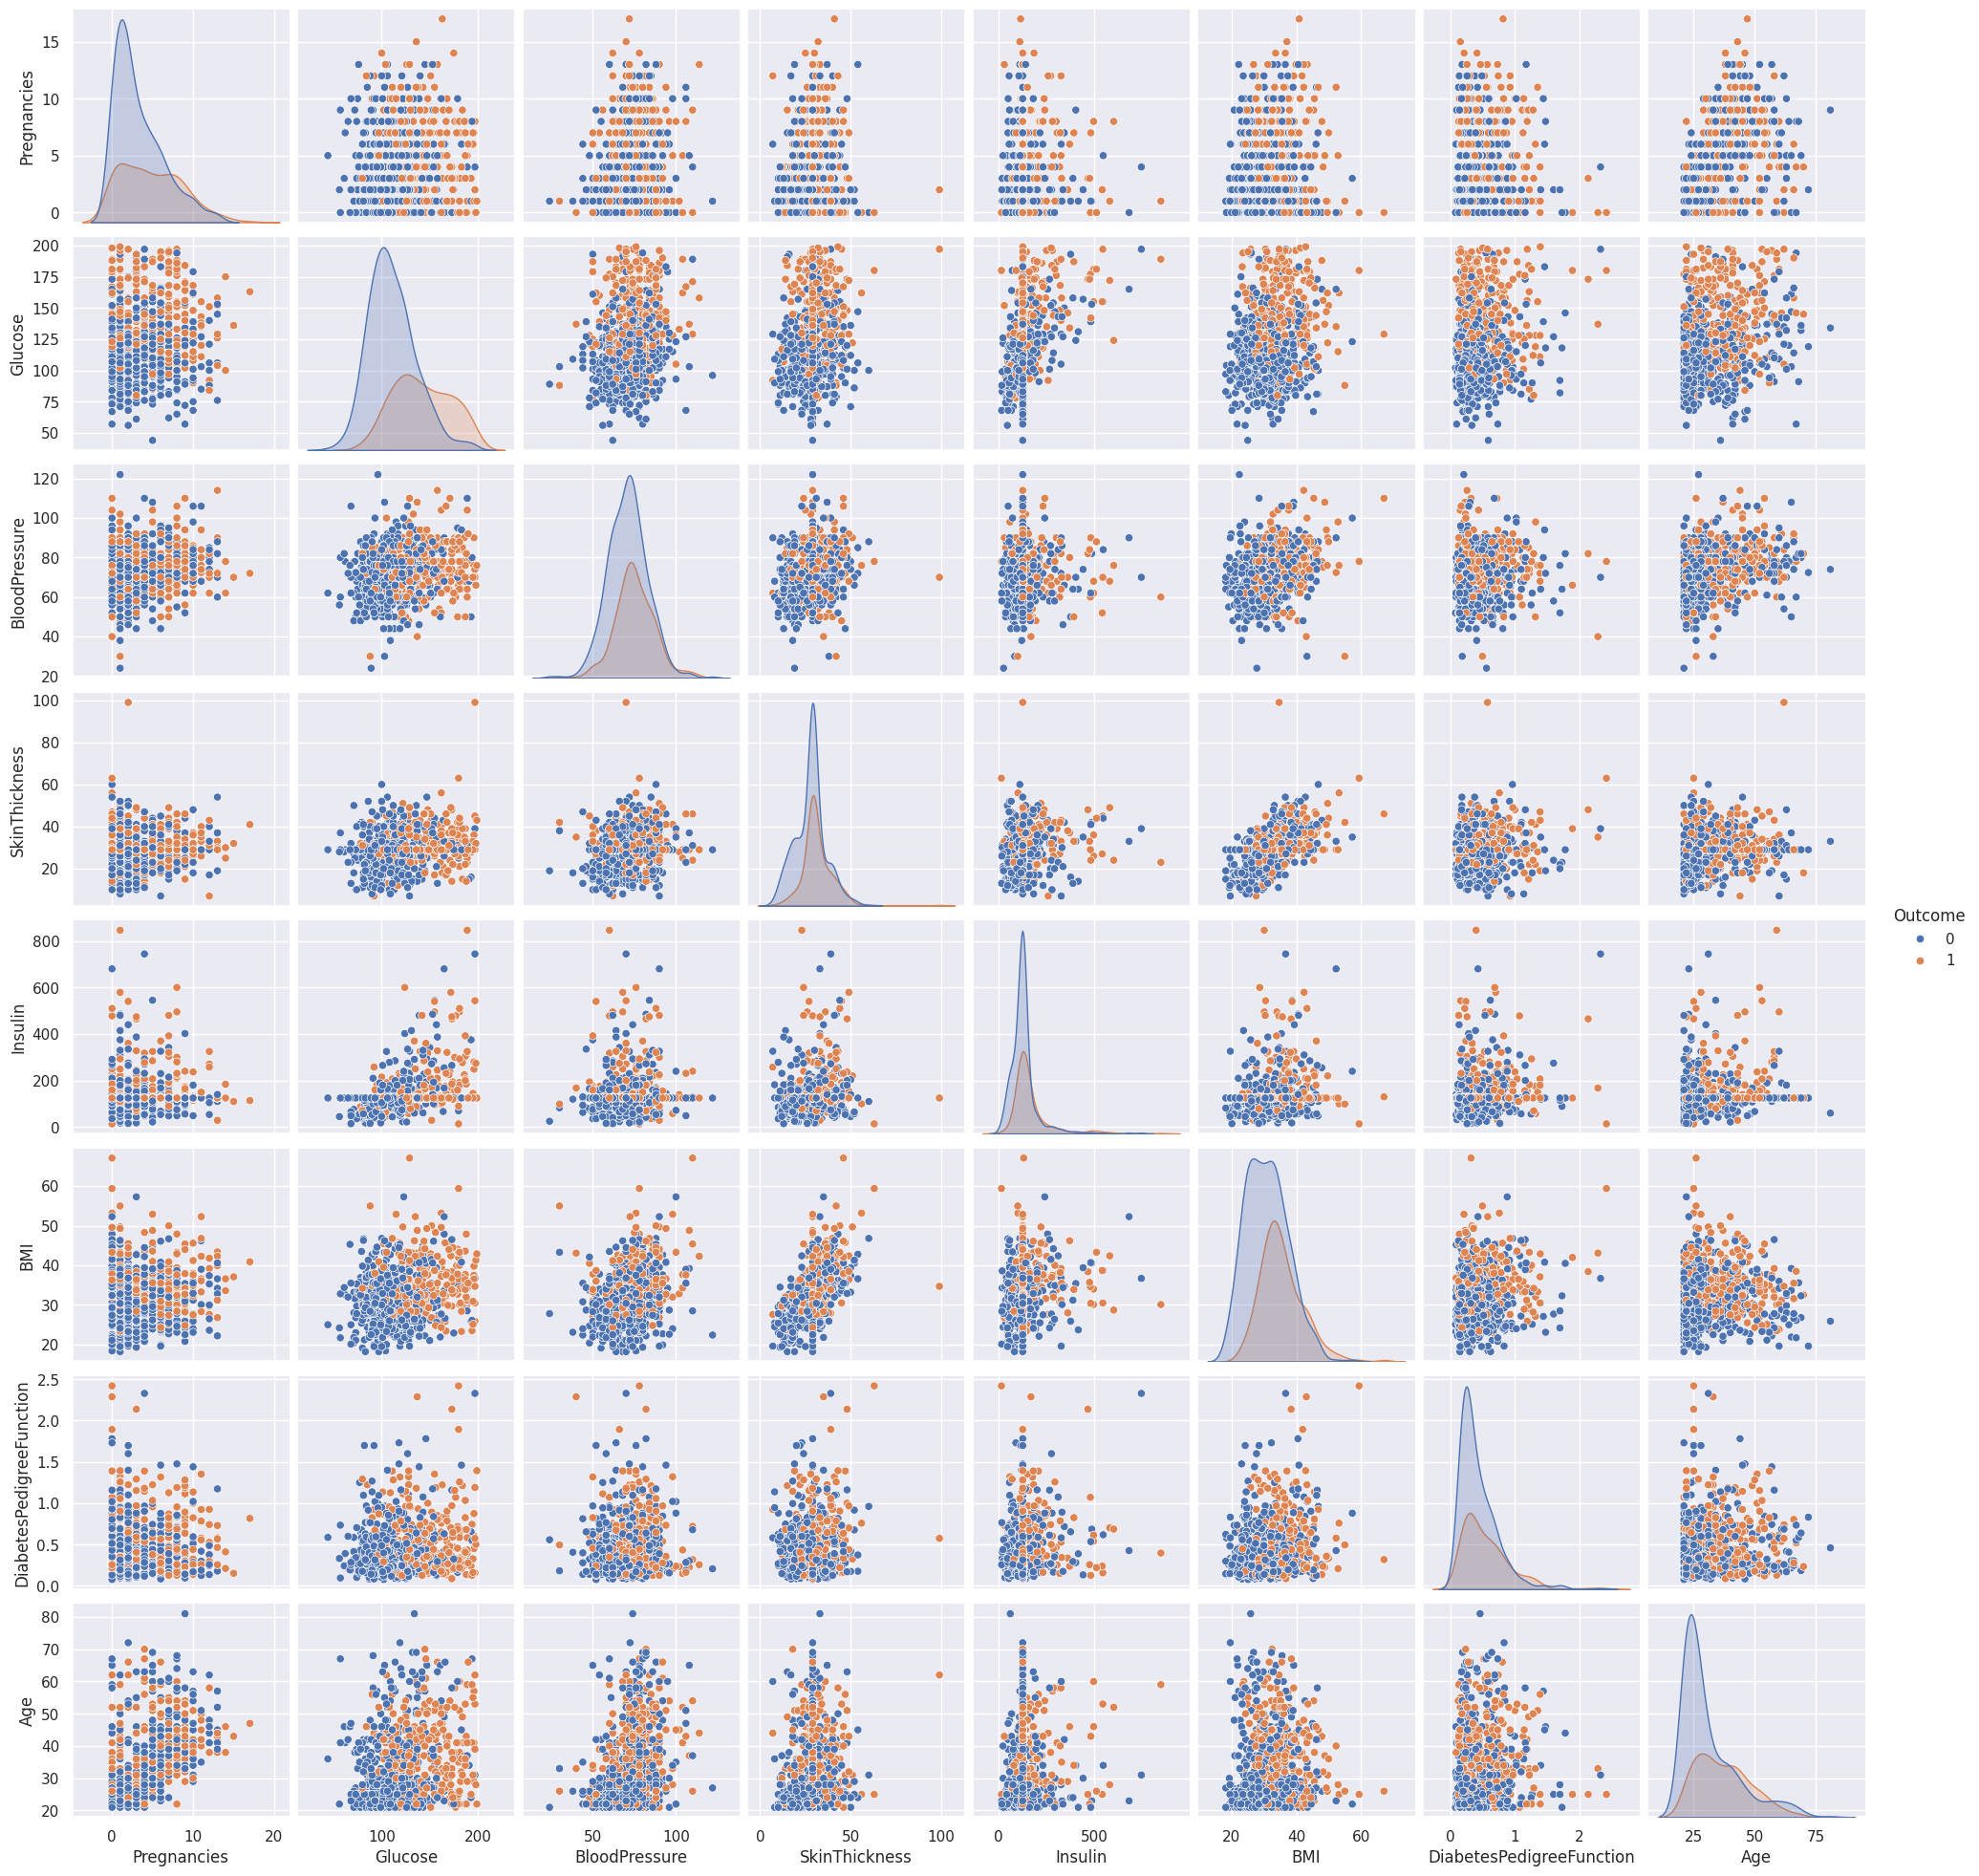

In [ ]:
p = sns.pairplot(df2, hue='Outcome')

#Preparing the Data and performing train_test_split


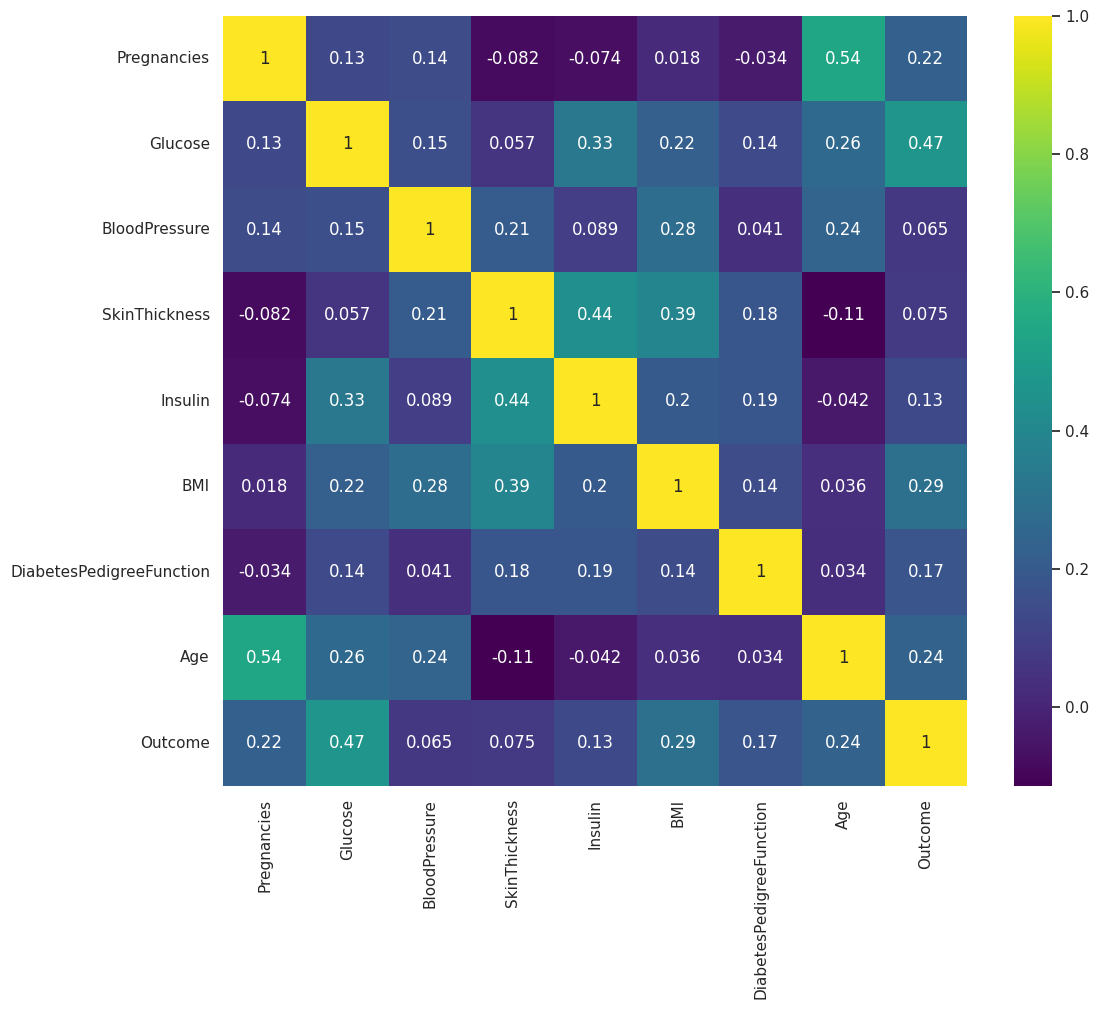

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True, cmap='viridis')

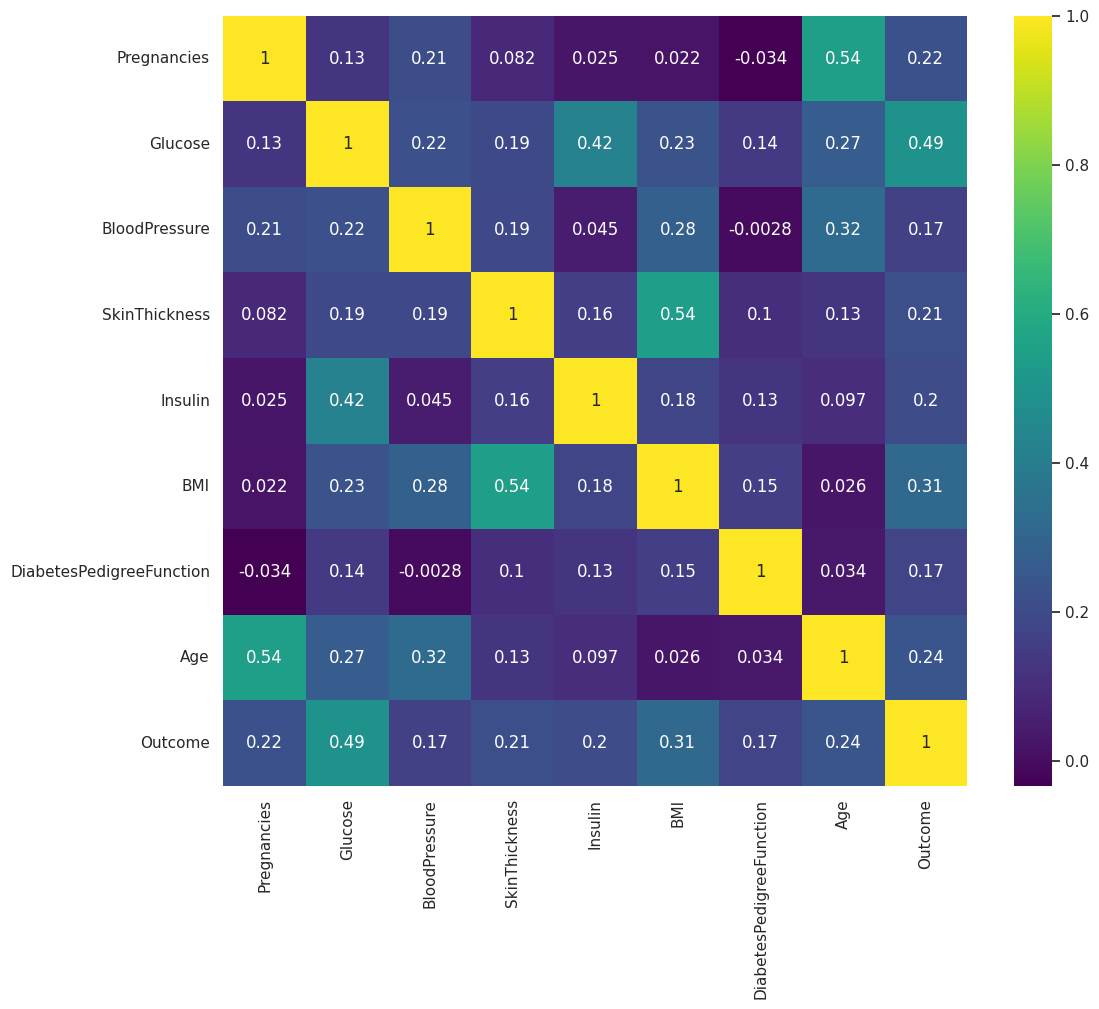

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df2.corr(), annot=True, cmap='viridis')

In [ ]:
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(df2.drop('Outcome', axis=1)), columns=df2.columns[:-1])
Y = df2['Outcome']
print(X)
print(Y)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1      -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2       1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3      -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4      -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.680125       0.297376       2.150354  0.455573  0.064737   
764    -0.547919  0.010298      -0.198965      -0.239949 -0.181541  0.632365   
765     0.342981 -0.022579      -0.033518      -0.695245 -0.332132 -0.910418   
766    -0.844885  0.141808      -1.026200      -0.012301 -0.181541 -0.342790   
767    -0.844885 -0.943143      -0.198965       0.215347 -0.181541 -0.299127   

     DiabetesPedigreeFunction       Age

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=42, stratify = Y)

#MODEL BUILDING - KNN

In [ ]:
test_scores = []
train_scores = []

for i in range (1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [ ]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [ ]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [ ]:
max_train_score = max(train_scores)
train_scores_indices = [i for i, v in enumerate(train_scores) if v == max_train_score]
print(f"Max Train Score: {max_train_score} (k={train_scores_indices[0]+1})")

Max Train Score: 1.0 (k=1)


In [ ]:
max_test_score = max(test_scores)
test_scores_indices = [i for i, v in enumerate(test_scores) if v == max_test_score]
print(f"Max Test Score: {max_test_score} (k={test_scores_indices[0]+1})")

Max Test Score: 0.765625 (k=11)


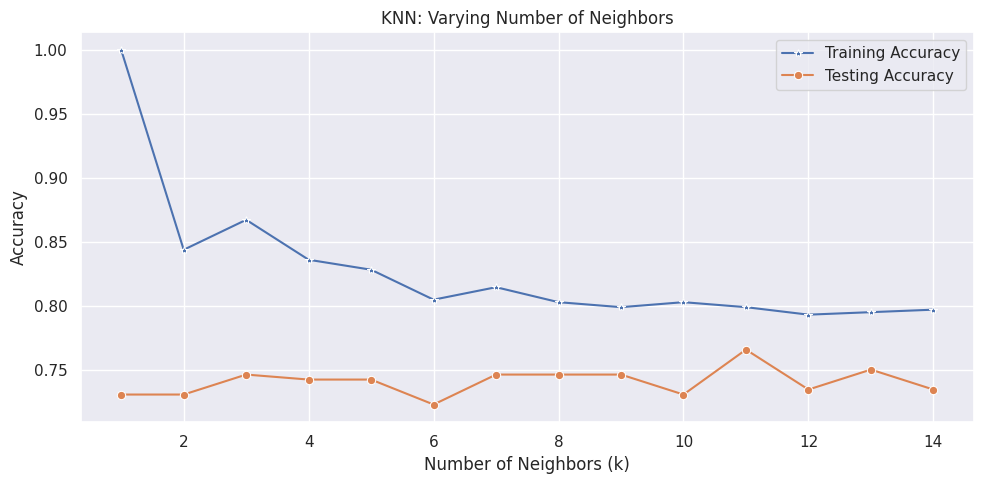

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 15), y=train_scores, label='Training Accuracy', marker='*')
sns.lineplot(x=range(1, 15), y=test_scores, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Varying Number of Neighbors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
best_k = 11
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Accuracy scores
print(f"Training Accuracy: {knn_best.score(X_train, y_train):.2f}")
print(f"Testing Accuracy: {knn_best.score(X_test, y_test):.2f}")


Training Accuracy: 0.80
Testing Accuracy: 0.77


Text(0.5, 19.049999999999997, 'Predicted label')

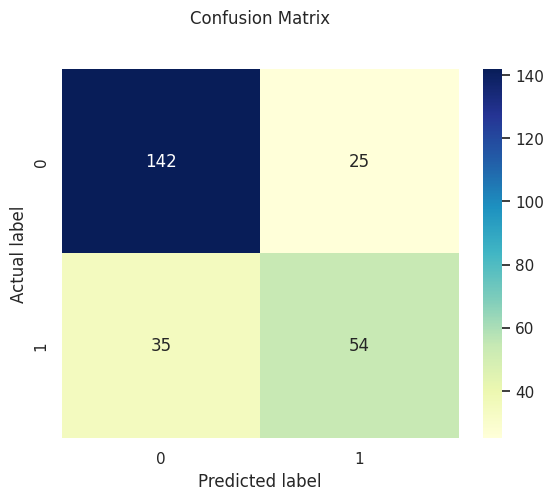

In [ ]:
from sklearn import metrics

y_pred = knn_best.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



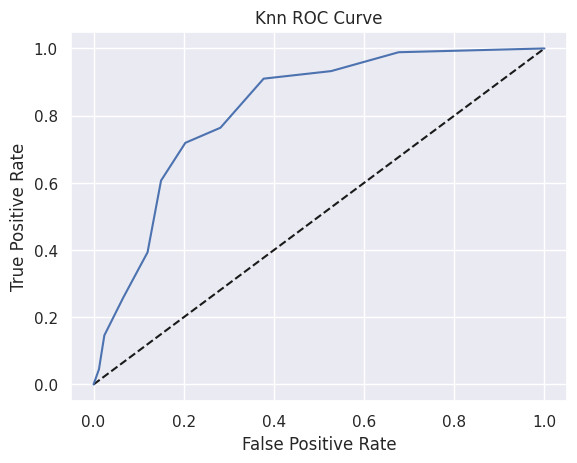

0.8193500639171096


In [ ]:
y_pred_proba = knn_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn ROC Curve')
plt.show()
z = roc_auc_score(y_test, y_pred_proba)
print(z)

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, Y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7708683473389355
Best Parameters: {'n_neighbors': np.int64(18)}


#MODEL BUILDING - XGB CLASSIFIER


✅ Training Accuracy: 0.91
✅ Testing Accuracy: 0.74


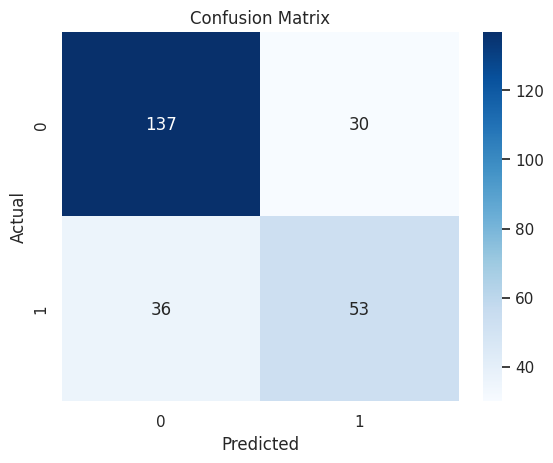


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       167
           1       0.64      0.60      0.62        89

    accuracy                           0.74       256
   macro avg       0.72      0.71      0.71       256
weighted avg       0.74      0.74      0.74       256



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8
)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"✅ Training Accuracy: {train_acc:.2f}")
print(f"✅ Testing Accuracy: {test_acc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

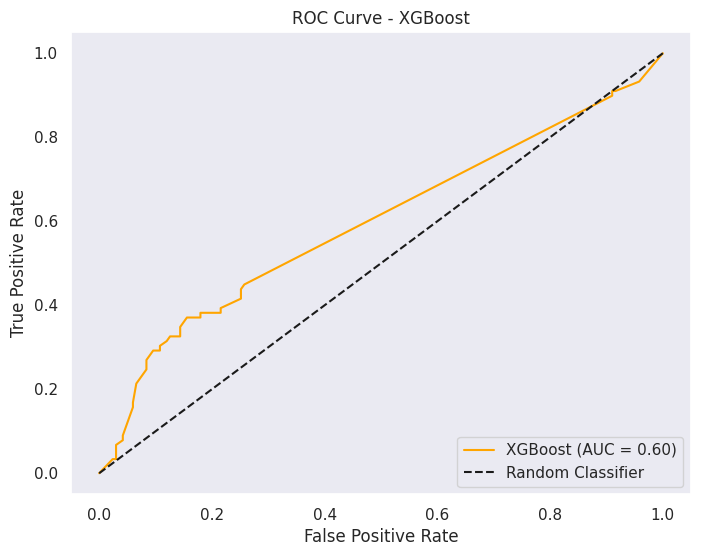

ROC AUC Score for XGBoost: 0.5960


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class using XGBoost
y_prob_xgb = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# Calculate AUC score
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC score
print(f"ROC AUC Score for XGBoost: {roc_auc_score(y_test, y_prob_xgb):.4f}")


#SHAP Calculations

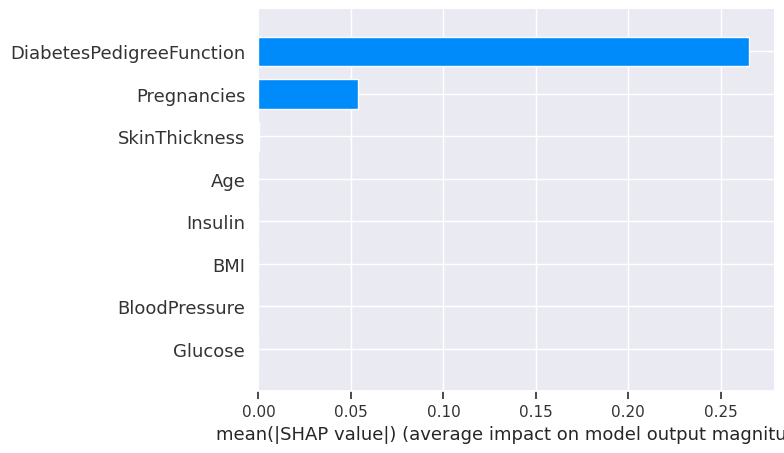

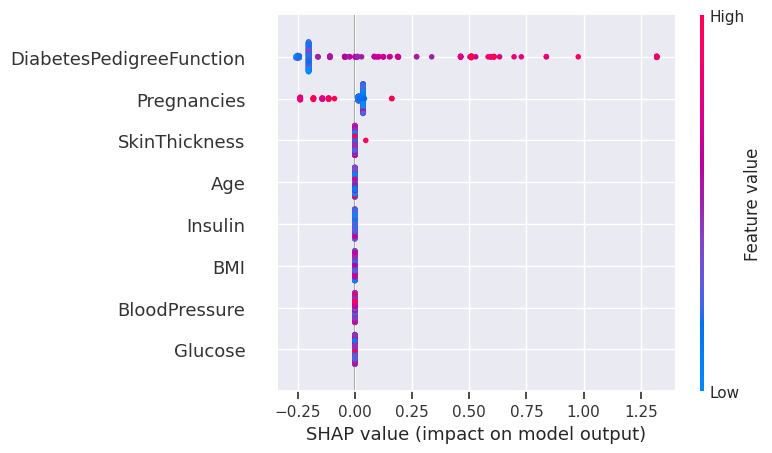

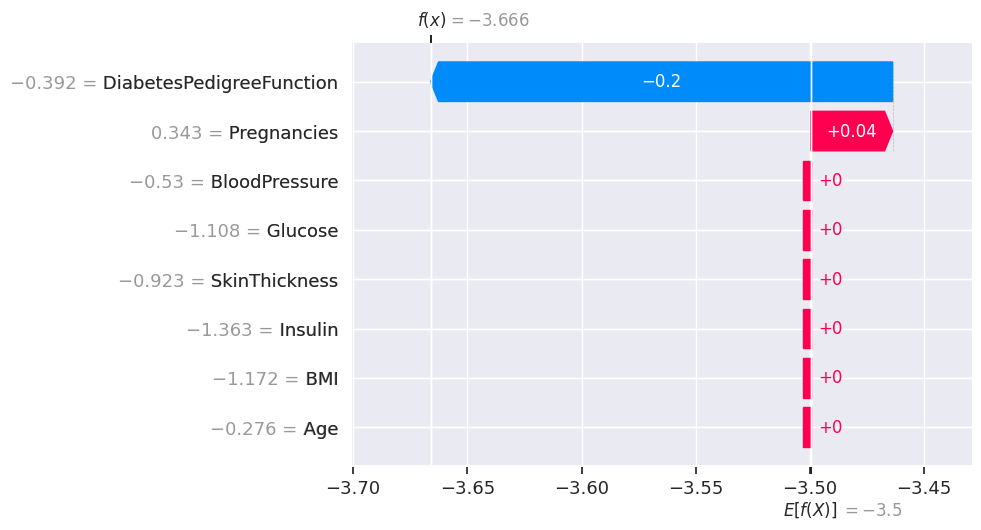

In [ ]:
!pip install shap


# 🔍 SHAP Explainability for XGBoost Model
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Initialize SHAP Explainer for your trained XGBoost model
explainer = shap.Explainer(model, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Global feature importance (bar chart)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed feature impact per instance (beeswarm)
shap.summary_plot(shap_values, X_test)

# Local explanation for a single prediction
shap.plots.waterfall(shap_values[0])
